# Examining Tech Stocks 

In this project I will analyze and visualize the "top" technology stocks as of the lowest point of the NASDAQ and S&P 500, roughly on March 23, 2020. It is interesting to see how the top technology companies did after the crash until recent. 

The time interval is relatively short, but it helps to take a closer look at what happaned after the tech stocks (or almost all stocks in general) took a big hit. There are other interesting time frames too like before the crash or examining the whole year, and I plan to include those findings later. 

These stocks were arbitrarily picked as they were claimed to be the "best" technology companies especially during this pandemic from websites like Investopedia and Kiplinger. There are definitely better ways to analyze the "best" technology stocks in general, but the point is to offer quick snapshot plots, analysis, and possible surprising findings of tech companies. Here are the stocks and their respective tickers (They are not in a particular order):

* Apple (NASDAQ:AAPL)
* Amazon (NASDAQ:AMZN)
* Microsoft (NASDAQ:MSFT)
* Facebook (NASDAQ:FB)
* Alibaba Group Holding Ltd (NYSE:BABA)
* Alphabet (NASDAQ:GOOG)
* Netflix (NASDAQ:NFLX)
* Shopify (NYSE:SHOP)
* NVIDIA (NASDAQ:NVDA)
* Zoom Video Communications (NASDAQ:ZM)


Using Pandas, Pandas-Datarader, Matplotlib, I will provide quick visuals to show the comparison between these stocks from March 23, 2020 to July 23, 2020. 

We will be looking at overall and individual plots, mean monthly returns, and the covariance and correlation between the stocks.

Here we import the necessary modules to use dataframes, create plots, and extract stock data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import cvxopt as opt
from cvxopt import blas, solvers
from pandas_datareader import data as web

In [2]:
# group tickers in a list
symbols = ['AAPL','AMZN','MSFT','FB','BABA','GOOG','NFLX','SHOP','NVDA','ZM']
# set dates 
start_date = "2020-03-23" 
end_date = "2020-07-28"
# extract data from yahoo
stock_data = web.get_data_yahoo(symbols,start_date,end_date)

# show data
print(stock_data.head(5))
print(stock_data['Adj Close'].head(5)) # choose the Adj Close attribute table

Attributes   Adj Close                                                    \
Symbols           AAPL         AMZN        BABA          FB         GOOG   
Date                                                                       
2020-03-23  223.764267  1902.829956  176.339996  148.100006  1056.619995   
2020-03-24  246.213516  1940.099976  185.750000  160.979996  1134.459961   
2020-03-25  244.857178  1885.839966  188.559998  156.210007  1102.489990   
2020-03-26  257.742310  1955.489990  195.320007  163.339996  1161.750000   
2020-03-27  247.071182  1900.099976  188.589996  156.789993  1110.709961   

Attributes                                                              ...  \
Symbols           MSFT        NFLX        NVDA        SHOP          ZM  ...   
Date                                                                    ...   
2020-03-23  135.602341  360.269989  212.592987  375.390015  159.559998  ...   
2020-03-24  147.928009  357.320007  249.066330  430.000000  135.179993  ...

We use the Adjusted Close stock price as it adjusts the raw closing stock price with possible stock splits or dividends. The provided monthly stock price function provided by Yahoo does not work, so the for loop below manually drops all the rows that do not fall on the 23rd day (except May 22nd). The table below shows the the adjusted closing price of our tech stocks as well as the plot over the time interval.

Symbols           AAPL         AMZN        BABA          FB         GOOG  \
Date                                                                       
2020-03-23  223.764267  1902.829956  176.339996  148.100006  1056.619995   
2020-04-23  274.287506  2399.449951  205.240005  185.130005  1276.310059   
2020-05-22  318.890015  2436.879883  199.699997  234.910004  1410.420044   
2020-06-23  366.529999  2764.409912  228.750000  242.240005  1464.410034   
2020-07-23  371.380005  2986.550049  251.880005  232.600006  1515.680054   

Symbols           MSFT        NFLX        NVDA        SHOP          ZM  
Date                                                                    
2020-03-23  135.602341  360.269989  212.592987  375.390015  159.559998  
2020-04-23  170.943909  426.700012  283.880463  620.489990  169.089996  
2020-05-22  183.509995  429.320007  360.885284  825.169983  171.059998  
2020-06-23  201.910004  466.260010  378.000000  911.340027  252.809998  
2020-07-23  202.539993  477.5

<Figure size 1440x720 with 0 Axes>

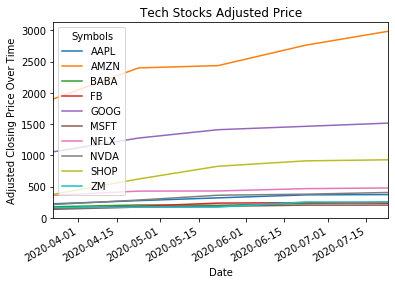

In [3]:
pd.set_option('mode.chained_assignment', None) # ignore warning
# drop all rows if the day is not the 23rd of each month with the exception of May 22th
stock_data_adj = stock_data['Adj Close'] # Adjusted Close is the most accurate stock price
for index,row in stock_data_adj.iterrows():
    current_date = str(index.date())
    current_date_day = str(index.date())[-2:]
    if(str(index.date()) == "2020-05-22"):
        continue
    elif(current_date_day != "23"):
        stock_data_adj.drop(index,inplace = True)

print(stock_data_adj)
plt.figure(figsize = (20,10))
stock_data_adj.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Tech Stocks Adjusted Price")
plt.show()

It is great to observe the closing adjusted price; however, observing the return every month is a better indicator of the stock's performance. For instance, over time the increase of a stock price of 10 dollars to a penny stock vs. Amazon obviously looks the same on price but vastly different on a relative scale – percentage change or returns.

Symbols           AAPL         AMZN        BABA          FB         GOOG  \
Date                                                                       
2020-03-23  223.764267  1902.829956  176.339996  148.100006  1056.619995   
2020-04-23  274.287506  2399.449951  205.240005  185.130005  1276.310059   
2020-05-22  318.890015  2436.879883  199.699997  234.910004  1410.420044   
2020-06-23  366.529999  2764.409912  228.750000  242.240005  1464.410034   
2020-07-23  371.380005  2986.550049  251.880005  232.600006  1515.680054   

Symbols           MSFT        NFLX        NVDA        SHOP          ZM  
Date                                                                    
2020-03-23  135.602341  360.269989  212.592987  375.390015  159.559998  
2020-04-23  170.943909  426.700012  283.880463  620.489990  169.089996  
2020-05-22  183.509995  429.320007  360.885284  825.169983  171.059998  
2020-06-23  201.910004  466.260010  378.000000  911.340027  252.809998  
2020-07-23  202.539993  477.5

<Figure size 1440x720 with 0 Axes>

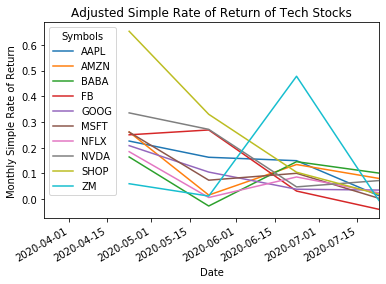

<Figure size 1152x648 with 0 Axes>

In [4]:
monthly_simple_ror = stock_data_adj.pct_change() # calculating returns month to month
print(stock_data_adj)
print(monthly_simple_ror)
plt.figure(figsize = (20,10))
monthly_simple_ror.plot()
plt.xlabel("Date")
plt.ylabel("Monthly Simple Rate of Return")
plt.title("Adjusted Simple Rate of Return of Tech Stocks")
plt.figure(figsize=(16,9))
plt.show()

The figure above looks very messy, so we can also see the individual plots of some of the stocks in our basket. It is worth nothing that Shopify had a more than 60% increase 1 month after the dip but that monthly return dramatically fell to around a 5% increase from June to July. From Zoom's plot, the monthly return shot up to a 50% increase from May to June 2020 and fell back to around 0% from June to July 2020.

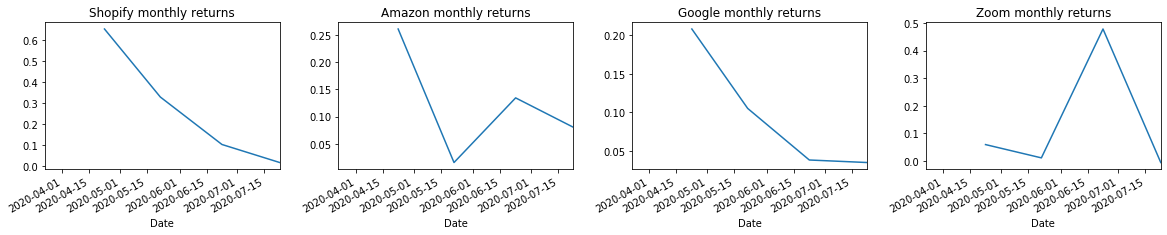

In [5]:
plt.figure(figsize = (20,3))
plt.subplot(1,4,1)
monthly_simple_ror_SHOP = stock_data_adj['SHOP'].pct_change()
plt.title("Shopify monthly returns")
monthly_simple_ror_SHOP.plot()

plt.subplot(1,4,2)
monthly_simple_ror_AMZN = stock_data_adj['AMZN'].pct_change()
plt.title("Amazon monthly returns")
monthly_simple_ror_AMZN.plot()

plt.subplot(1,4,3)
monthly_simple_ror_GOOG = stock_data_adj['GOOG'].pct_change()
plt.title("Google monthly returns")
monthly_simple_ror_GOOG.plot()

plt.subplot(1,4,4)
monthly_simple_ror_ZM = stock_data_adj['ZM'].pct_change()
plt.title("Zoom monthly returns")
monthly_simple_ror_ZM.plot()

plt.subplots_adjust(hspace = 0.7,wspace = 0.25)
plt.show()

Now we will look at the mean monthly return of every company. The average monthly stock return helps us compare stock performance against each other. From the graph, Shopify clearly has the greatest mean monthly return as their early monthly returns were incredible (65.29% increase from March to April 2020). It makes sense that companies like Shopify, Alibaba, and Amazon would be winners during the pandemic, and Amazon and Alibaba did have great returns (12.3% and 9.6% increase average return respectively). It seemed that with traditional retail stores closing and turning to online stores, Shopify was the go-to platform.

My biggest surprise was that Netflix was the lowest average monthly return of 7.5% increase (which, to be fair, is still very good), but with outdoor activities, entertainment, particularly cinemas closing, I expected Netflix to do tremendously.

Symbols
AAPL    0.137756
AMZN    0.122838
BABA    0.095870
FB      0.127584
GOOG    0.096571
MSFT    0.109381
NFLX    0.075213
NVDA    0.181484
SHOP    0.276487
ZM      0.136025
dtype: float64


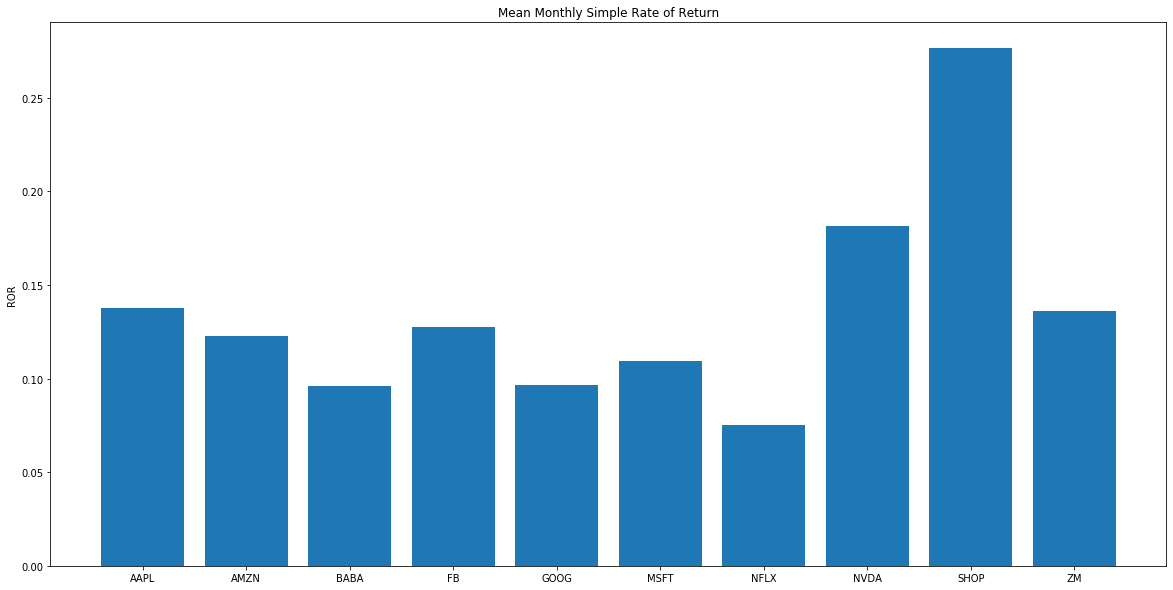

In [6]:
# step 1
mean_return = monthly_simple_ror.mean()
print(mean_return)
# step 2 or use mean_return.keys() as the first bar chart arguement
plt.figure(figsize = (20,10))
plt.bar(mean_return.keys(),mean_return)
plt.ylabel("ROR")
plt.title("Mean Monthly Simple Rate of Return")
plt.show()

Now we will observe the variance and standard deviation, and these metrics are an indicator of volatility or risk. Generally the higher the variance or standard deviation, the more risky the stock is. From our individual plot of Zoom, we see a large 'mountain' shaped curve, and it is consistent with Zoom's decent average return but high volatility. Shopify's volatility is the highest mainly because of their monthly return drop from grace (65% increase to almost 0%)

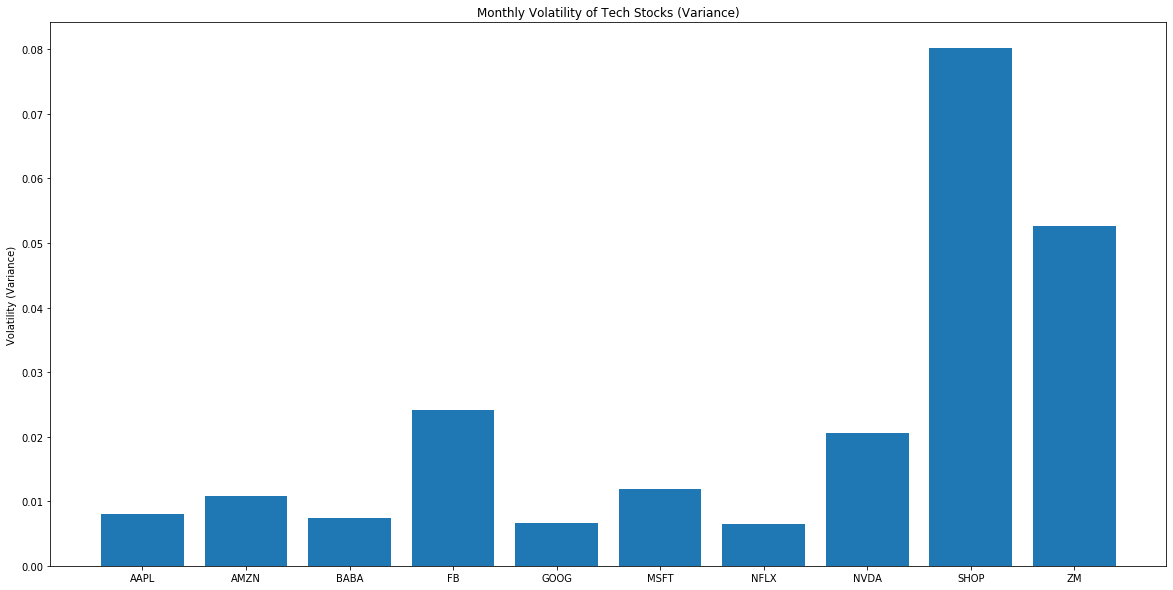

In [7]:
var_return = monthly_simple_ror.var() # calculate monthly variance
plt.figure(figsize = (20,10))
plt.bar(monthly_simple_ror.keys(),var_return)
plt.title("Monthly Volatility of Tech Stocks (Variance)")
plt.ylabel("Volatility (Variance)")
plt.show()

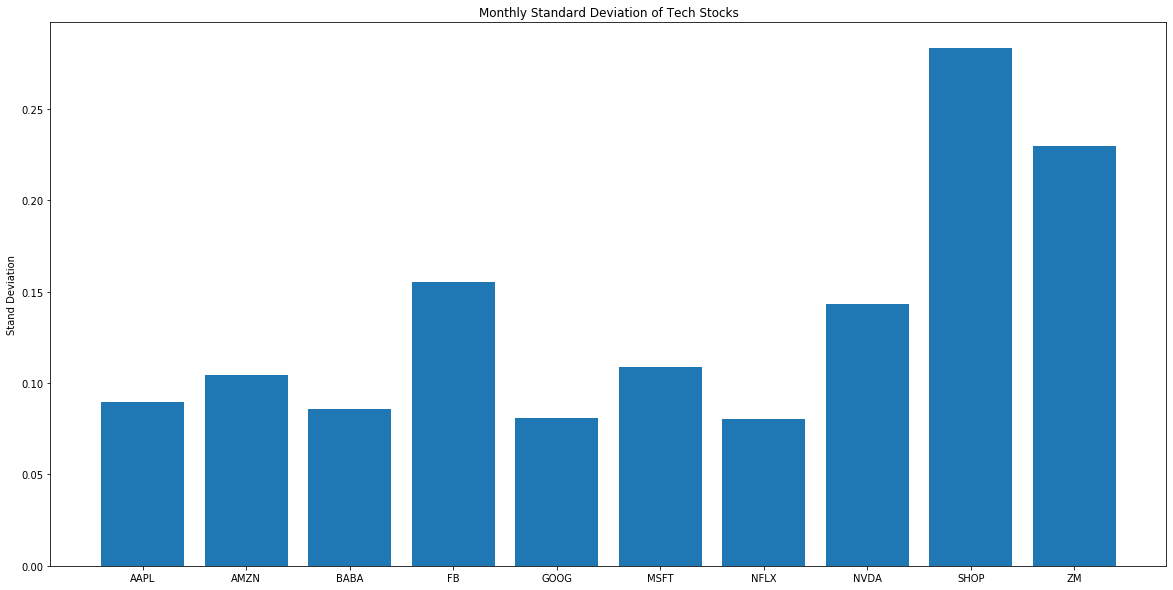

In [8]:
sd_return = monthly_simple_ror.std() # calculate monthly standard deviation
plt.figure(figsize = (20,10))
plt.bar(monthly_simple_ror.keys(),sd_return)
plt.title("Monthly Standard Deviation of Tech Stocks")
plt.ylabel("Stand Deviation")
plt.show()

The covariance and correlation matrix is my favorite peice of data to look at because it can reveal underlying relationships between companies based on stock returns. Although a stock price does not always reflect the value of a company, I believe that the stock price, in the long run, will converge to its true value. So I think it's still really useful to see the raw and unbiased stock relationship between companies. Since these are all technology stocks, it makes perfect sense that most of the covariance and correlations are positive as, in general, technology companies are affected in the same way. For instance, if the internet suddenly stopped working for everyone one day, it would be detrimental to all technology companies.

In [9]:
cov_matrix = monthly_simple_ror.cov() # covariance matrix
print(cov_matrix)

Symbols      AAPL      AMZN      BABA        FB      GOOG      MSFT      NFLX  \
Symbols                                                                         
AAPL     0.008003  0.004974  0.000953  0.011338  0.005667  0.008516  0.004788   
AMZN     0.004974  0.010842  0.007641  0.002586  0.005471  0.009717  0.008260   
BABA     0.000953  0.007641  0.007403 -0.004897  0.001105  0.004562  0.005394   
FB       0.011338  0.002586 -0.004897  0.024089  0.010253  0.010705  0.003697   
GOOG     0.005667  0.005471  0.001105  0.010253  0.006553  0.007869  0.004691   
MSFT     0.008516  0.009717  0.004562  0.010705  0.007869  0.011845  0.008101   
NFLX     0.004788  0.008260  0.005394  0.003697  0.004691  0.008101  0.006467   
NVDA     0.009285  0.004910 -0.002597  0.020927  0.010817  0.010970  0.004908   
SHOP     0.021520  0.018413  0.003053  0.037788  0.022755  0.027992  0.016225   
ZM       0.003918  0.004250  0.008769 -0.012078 -0.006930  0.001604  0.003719   

Symbols      NVDA      SHOP

For a sanity check, I see that the correlation (relationship between two variables or companies in this case from -1 to 1) between Zoom and Alibaba is 0.44, a moderate positive relationship, Zoom and Amazon is 0.18, a weak positive relationship, and Alibaba and Amazon is 0.853, a very strong positive correlation. This makes sense as Amazon and Alibaba are tech companies focused on ecommerce while Zooom is a telecommuting platform. 

To put this in another way, it is evident that this pandemic was very profitable to the ecommerce industry. Suppose retail is transformed, and people will shop online forever. This will clearly benefit Alibaba almost as much as Amazon (high correlation of 0.853) but will not really affect Zoom. 

Two surprising findings are the extremely high correlation of 0.99 between Google and Shopify's stock returns as well as a correlation of 0.99 between Amazon and Netflix. Netflix uses Amazon Web Services (AWS) to power its business, and Amazon profits from that, so this could be one of many reasons why they're so strongly correlated. It seems that Shopify sees Amazon as a competitor, so by they use Google for their business platform and so Google would profit as Shopify profits.

This is, of course, assuming that the stock price reflects the actual value of the companies.
There are probably thousands of reasons why these tech company stocks are so interconnected and why some aren't.

In [10]:
corr_matrix = monthly_simple_ror.corr() # correlation matrix
print(corr_matrix)

Symbols      AAPL      AMZN      BABA        FB      GOOG      MSFT      NFLX  \
Symbols                                                                         
AAPL     1.000000  0.533945  0.123765  0.816559  0.782552  0.874673  0.665463   
AMZN     0.533945  1.000000  0.852917  0.160031  0.649043  0.857433  0.986410   
BABA     0.123765  0.852917  1.000000 -0.366701  0.158632  0.487136  0.779565   
FB       0.816559  0.160031 -0.366701  1.000000  0.816062  0.633733  0.296158   
GOOG     0.782552  0.649043  0.158632  0.816062  1.000000  0.893220  0.720606   
MSFT     0.874673  0.857433  0.487136  0.633733  0.893220  1.000000  0.925577   
NFLX     0.665463  0.986410  0.779565  0.296158  0.720606  0.925577  1.000000   
NVDA     0.723754  0.328800 -0.210432  0.940192  0.931808  0.702834  0.425526   
SHOP     0.849434  0.624460  0.125309  0.859728  0.992638  0.908194  0.712434   
ZM       0.190773  0.177800  0.443945 -0.338966 -0.372898  0.064177  0.201417   

Symbols      NVDA      SHOP

This is as far as I will go for now, but I plan to make deeper analysis on individual stocks, more time frames, and, most importantly, elaborate on the speculations and surprising findings I have made throughout this section.